# DBSCAN (Density-based Spatial Clustering of Applications with Noise)

## Imports

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Generating Data

In [90]:
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples=1500, centers=[[4, 3], [2, -3], [-3, 4]], cluster_std=1)

## Plot

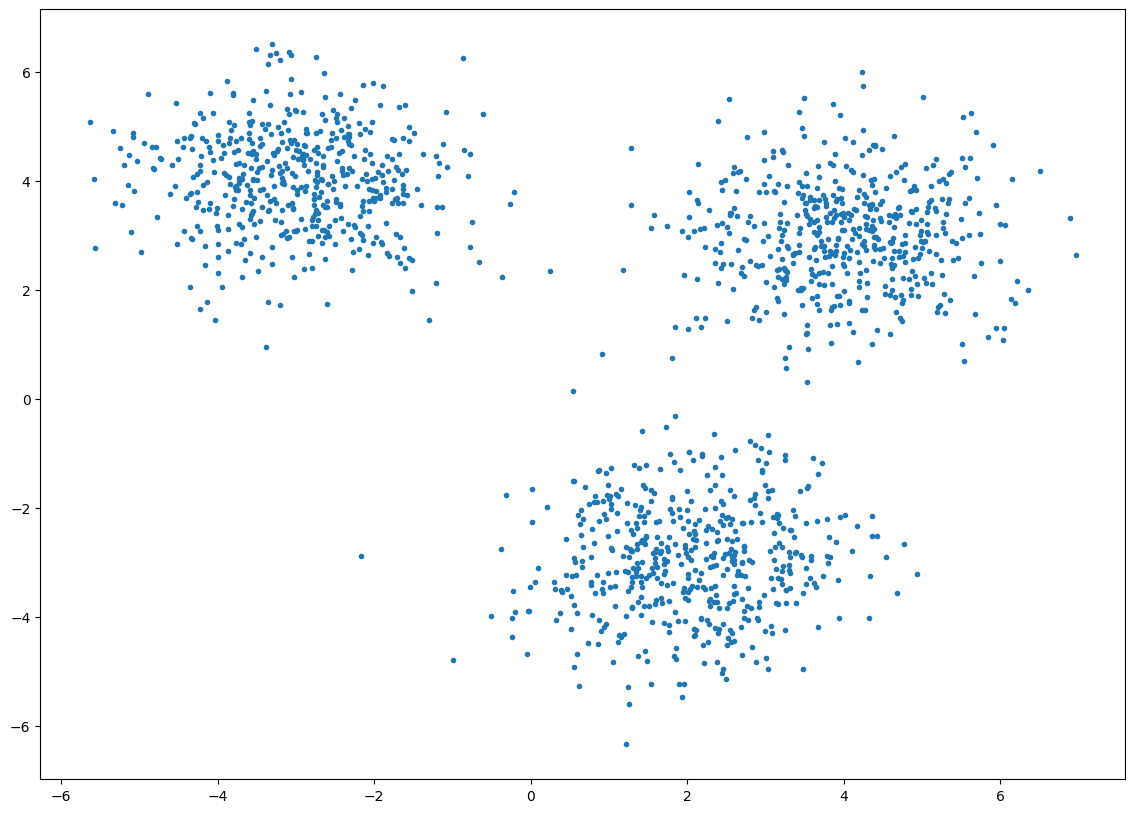

In [91]:
plt.scatter(x[:, 0], x[:, 1], marker=".")

## Standardizing Data

In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x)
x = scaler.transform(x)
x

array([[-1.5423045 ,  1.31183521],
       [ 1.01417829,  0.41697667],
       [-0.02508195, -1.5271375 ],
       ...,
       [ 0.9355786 ,  0.4879107 ],
       [ 0.46032068, -1.9776123 ],
       [ 0.49597344,  0.34950677]], shape=(1500, 2))

## Plot Standard Data

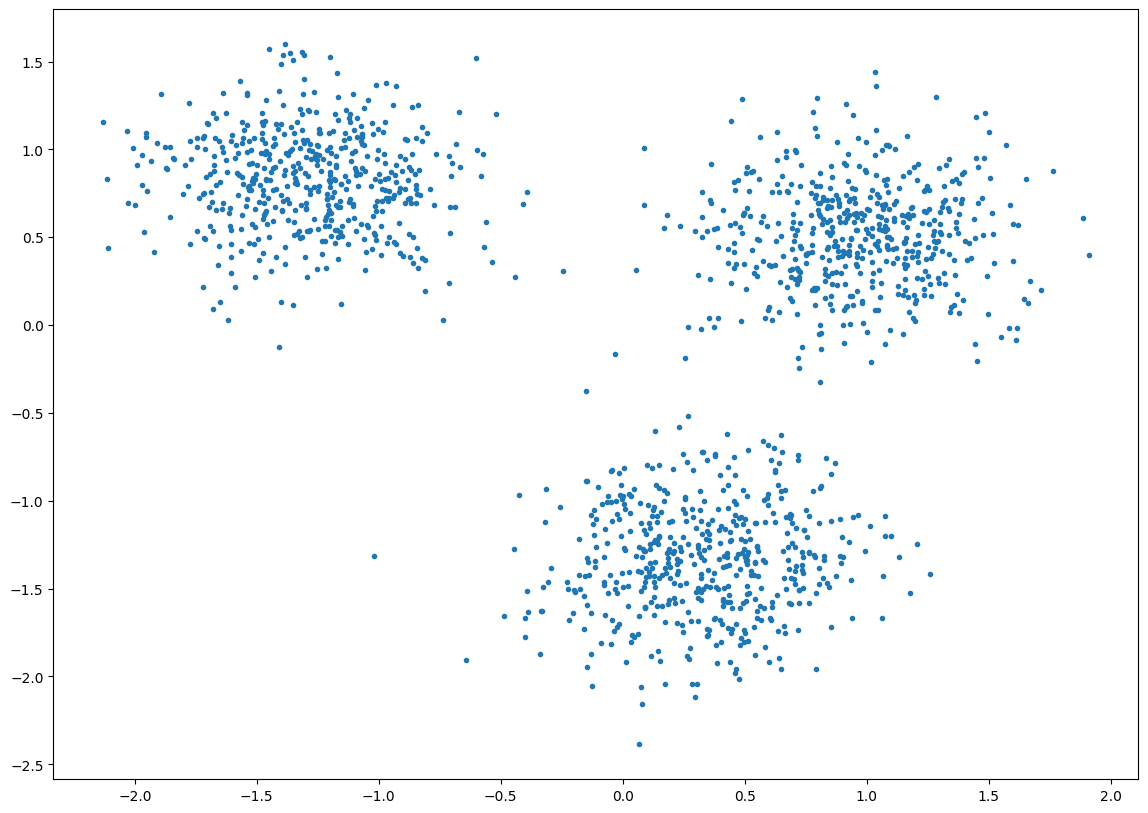

In [93]:
plt.scatter(x[:, 0], x[:, 1], marker=".")

## Modelling (Clustering)

In [94]:
from sklearn.cluster import DBSCAN

eps = 0.3   # default 0.5
min_samples = 7 # default 5


dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="euclidean")
dbscan.fit(x)

labels = dbscan.labels_
labels[:20]

array([ 0,  1,  2,  1,  2,  2,  1, -1,  0,  0,  1,  1,  1,  0,  1,  0,  2,
        0,  2,  0])

## Distinguish Outliers (Anomaly Records)

In [95]:
core_samples_mask = np.zeros_like(labels, dtype=bool) # [False, False, ...] with the same shape as labels array
core_samples_mask[dbscan.core_sample_indices_] = True # Sets the elements of core_samples_mask corresponding to core points to True

core_samples_mask[0:20] # True: the point is "Core"; False: The point is either "Border" or "Noise"

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

## Cluster Count and Unique Labels

In [96]:
unique_labels = set(labels)
clusters_count = len(unique_labels) - (1 if -1 in labels else 0)

## Data Visualization

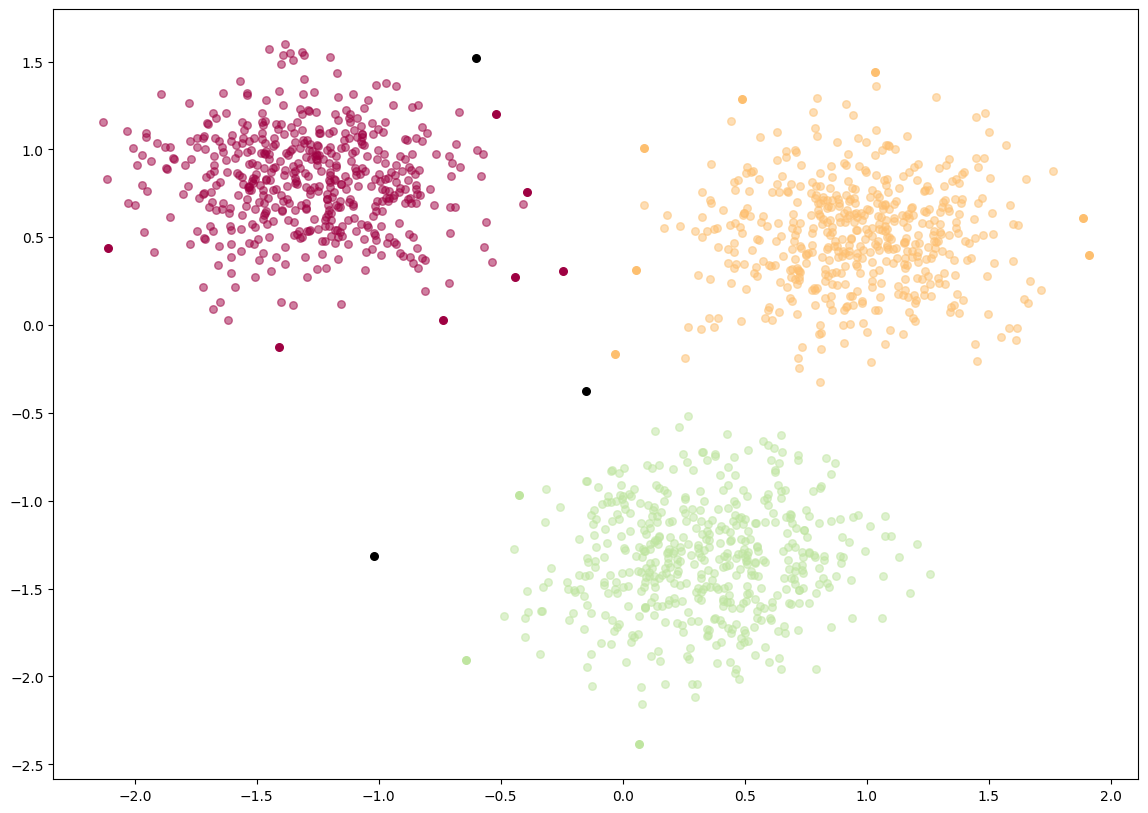

In [97]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if (label == -1): 
        color = "k"

    cluster_members_mask = (labels == label)
    
    # Clustered Datapoints
    cluster_members = x[cluster_members_mask & core_samples_mask]
    plt.scatter(cluster_members[:, 0], cluster_members[:, 1], s=30, marker="o", color=color, alpha=0.5)
    
    # Noise Datapoints
    noises = x[cluster_members_mask & ~core_samples_mask]
    plt.scatter(noises[:, 0], noises[:, 1], s=30, marker="o", color=color)

## If We Use K-Means Instead (There is No Noise Here):

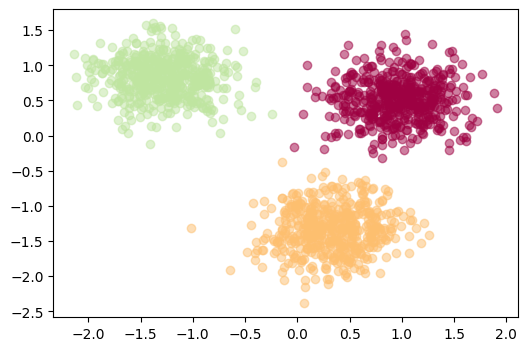

In [98]:
from sklearn.cluster import KMeans 

k = 3
k_means = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
k_means.fit(x)

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(k), colors):
    my_members = (k_means.labels_ == k)
    plt.scatter(x[my_members, 0], x[my_members, 1],  color=col, marker='o', alpha=0.5)

plt.show()

<hr>

## Reading Real Data

In [99]:
df = pd.read_csv("weather-stations20140101-20141231.csv")
df.head()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


## Cleaning Data

In [100]:
df = df[pd.notnull((df["Tm"]))]
df.reset_index(drop=True)

df.head()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
5,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,...,8.0,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710


## Visualization

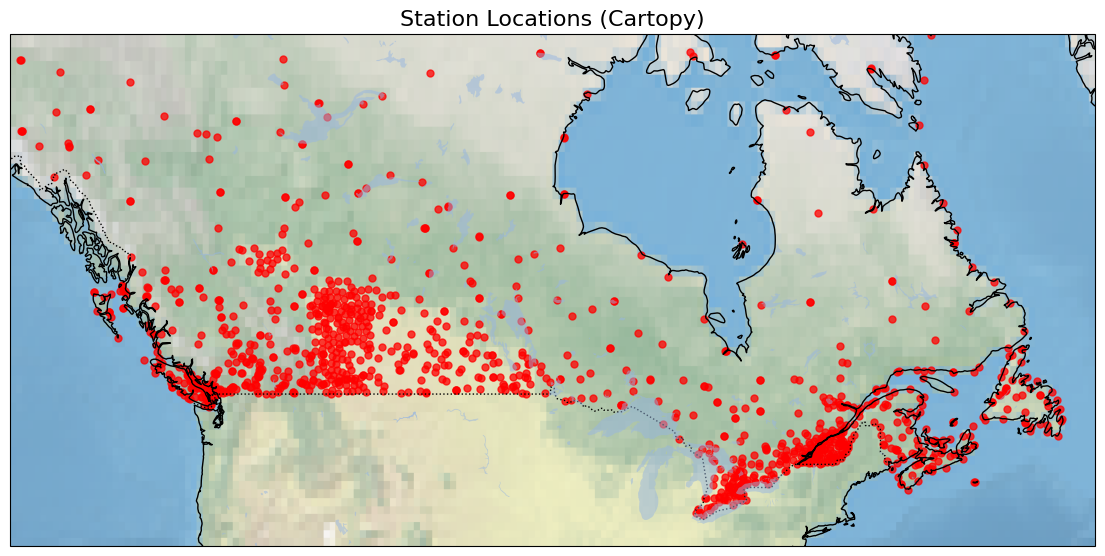

In [101]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# --- DEFINE MAP PROJECTIONS ---
# Mercator projection: the one used to make your map
proj_map = ccrs.Mercator()

# PlateCarree projection: the original coordinate system (longitude/latitude in degrees)
proj_geo = ccrs.PlateCarree()

# --- CARTOPY ALTERNATIVE TO BASEMAP COORDINATE CONVERSION ---
# This section replaces:
# xs, ys = my_map(np.asarray(pdf.Long), np.asarray(pdf.Lat))

# Transform raw geographic coordinates (lon/lat) into projected x/y coordinates
# transform_points returns an array of shape (N, 3) → [x, y, z]
xs, ys = proj_map.transform_points(proj_geo, np.asarray(df['Long']), np.asarray(df['Lat']))[:, :2].T

# Store these projected coordinates into your DataFrame
df['xm'] = xs
df['ym'] = ys

#----------------------------------------

# Define region limits
# llon = lower longitude (west edge)
# ulon = upper longitude (east edge)
# llat = lower latitude (south edge)
# ulat = upper latitude (north edge)
llon, ulon = -140, -50
llat, ulat = 40, 65

df = df[(df['Long'] > llon) & (df['Long'] < ulon) & (df['Lat'] > llat) & (df['Lat'] < ulat)]

# Set up Cartopy map with Mercator projection
fig = plt.figure(figsize=(14, 10))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([llon, ulon, llat, ulat], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='white', alpha=0.3)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, alpha=0.5)

# Optional shaded relief background
ax.stock_img()  # simple shaded relief background
# Alternative (higher quality): from cartopy.io.img_tiles import Stamen('terrain')

# Convert coordinates and plot points
ax.scatter(df['Long'], df['Lat'], color='red', s=25, alpha=0.75, transform=ccrs.PlateCarree())

plt.title("Station Locations (Cartopy)", fontsize=16)
plt.show()

## Normalizing Data

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

check_random_state(1000)

data_set = df[["xm", "ym"]]
data_set = np.nan_to_num(data_set)

scaler = StandardScaler().fit(data_set)
data_set = scaler.transform(data_set)

## DBSCAN Clustering

In [103]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.15, min_samples=10)
dbscan.fit(data_set)

labels = dbscan.labels_
df["cluster_dbscan_label"] = labels

core_samples_mask = np.zeros_like(labels, dtype=bool) # all False
core_samples_mask[dbscan.core_sample_indices_] = True

clusters_count = len(set(labels))
realClustersCount = clusters_count - (1 if -1 in labels else 0)

df[["Stn_Name","Tx","Tm","cluster_dbscan_label"]].tail()

,Stn_Name,Tx,Tm,cluster_dbscan_label
1336,NAIN A,-6.8,-22.6,-1
1337,NAIN A,-7.5,-19.2,-1
1338,SAGLEK,-13.5,-24.4,-1
1339,TUKIALIK BAY,-5.8,-22.8,-1
1340,WABUSH A,-13.6,-27.7,-1


## Visualization of clusters based on location

Cluster 0, Avg Temp: -5.54
Cluster 1, Avg Temp: 1.95
Cluster 2, Avg Temp: -9.20
Cluster 3, Avg Temp: -15.30
Cluster 4, Avg Temp: -7.77


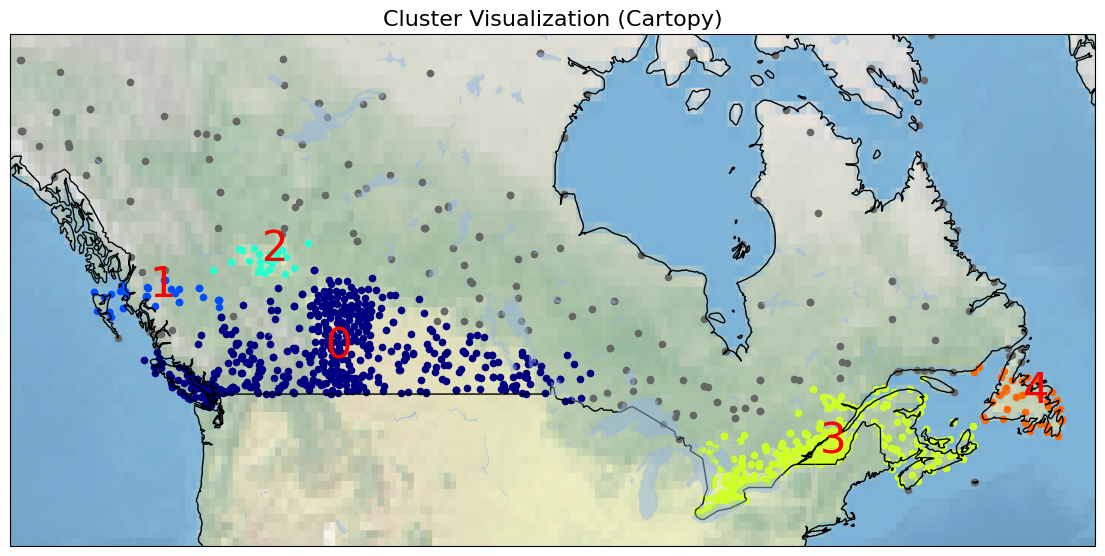

In [104]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from pylab import rcParams

# Same figure size
rcParams['figure.figsize'] = (14, 10)

# --- REGION LIMITS ---
llon, ulon = -140, -50
llat, ulat = 40, 65

# --- DEFINE PROJECTIONS ---
proj_map = ccrs.Mercator()      # the map projection (like Basemap Mercator)
proj_geo = ccrs.PlateCarree()   # input coordinates are lon/lat degrees

# --- TRANSFORM RAW GEO COORDS TO PROJECTED (x, y) ---
points = proj_map.transform_points(proj_geo, np.asarray(df['Long']), np.asarray(df['Lat']))
df['xm'] = points[:, 0]
df['ym'] = points[:, 1]

# --- CREATE FIGURE AND AXIS ---
fig = plt.figure()
ax = plt.axes(projection=proj_map)
ax.set_extent([llon, ulon, llat, ulat], crs=proj_geo)

# --- BASIC MAP FEATURES (Basemap equivalents) ---
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='white', alpha=0.3)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, alpha=0.5)

# 'shadedrelief' alternative:
ax.stock_img()  # gives a simple shaded terrain-like background

# --- COLOR MAP FOR CLUSTERS ---
colors = plt.get_cmap('jet')(np.linspace(0, 1, clusters_count))

# --- VISUALIZATION LOOP ---
for label in sorted(set(labels)):
    # Gray for noise (-1), otherwise pick from color map
    color = ([0.4, 0.4, 0.4]) if label == -1 else colors[int(label)]
    clusters_set = df[df['cluster_dbscan_label'] == label]

    ax.scatter(clusters_set['Long'], clusters_set['Lat'], color=color, marker='o', s=20, transform=proj_geo)

    # cluster label annotation
    if label != -1 and len(clusters_set) > 0:
        label_x = np.mean(clusters_set['Long'])
        label_y = np.mean(clusters_set['Lat'])
        ax.text(label_x, label_y, str(label), fontsize=30, color="r", transform=proj_geo)  # text in lon/lat coords

        print(f"Cluster {label}, Avg Temp: {np.mean(clusters_set['Tm']):.2f}")

plt.title("Cluster Visualization (Cartopy)", fontsize=16)
plt.show()


## Clustering of stations based on their location, mean, max, and min Temperature

In [105]:
from sklearn.utils import check_random_state
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

check_random_state(1000)

data_set = df[["xm","ym","Tx","Tm","Tn"]]
data_set = np.nan_to_num(data_set)

scaler = StandardScaler().fit(data_set)
data_set = scaler.transform(data_set)

# Compute DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10).fit(data_set)
labels = dbscan.labels_

core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
df["cluster_dbscan_label"] = labels


clusters_count = len(set(labels))
realClustersCount = clusters_count - (1 if -1 in labels else 0)

df[["Stn_Name","Tx","Tm","cluster_dbscan_label"]].head()

,Stn_Name,Tx,Tm,cluster_dbscan_label
0,CHEMAINUS,13.5,8.2,0
1,COWICHAN LAKE FORESTRY,15.0,7.0,0
2,LAKE COWICHAN,16.0,6.8,0
4,DUNCAN KELVIN CREEK,14.5,7.7,0
5,ESQUIMALT HARBOUR,13.1,8.8,0


## isualization of clusters based on location and Temperture

Cluster 0, Avg Temp: 6.22
Cluster 1, Avg Temp: 6.79
Cluster 2, Avg Temp: -0.49
Cluster 3, Avg Temp: -13.88
Cluster 4, Avg Temp: -4.19
Cluster 5, Avg Temp: -16.30
Cluster 6, Avg Temp: -13.60
Cluster 7, Avg Temp: -9.75
Cluster 8, Avg Temp: -4.26


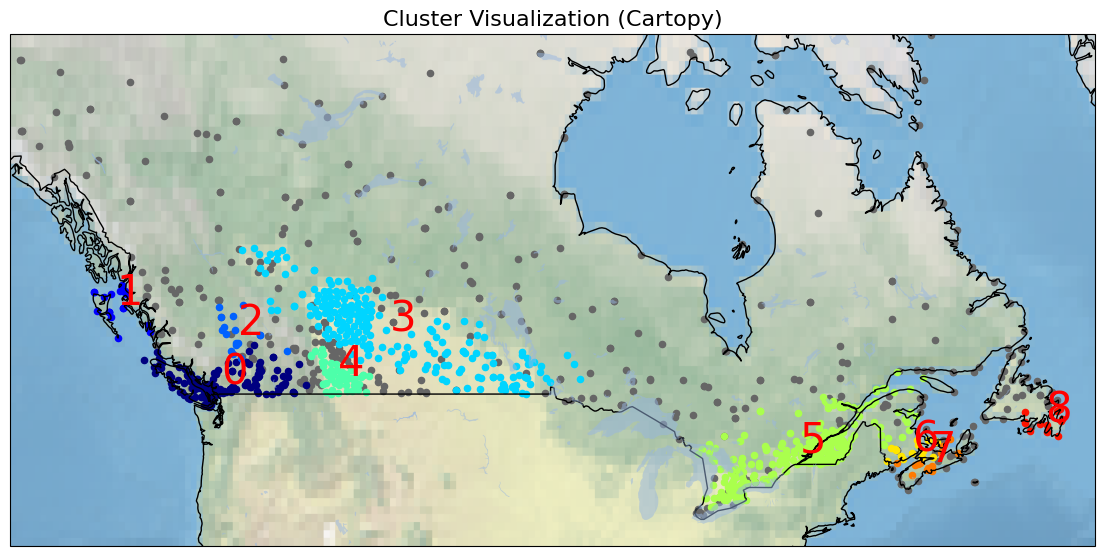

In [108]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from pylab import rcParams

# Same figure size
rcParams['figure.figsize'] = (14, 10)

# --- REGION LIMITS ---
llon, ulon = -140, -50
llat, ulat = 40, 65

# --- DEFINE PROJECTIONS ---
proj_map = ccrs.Mercator()      # the map projection (like Basemap Mercator)
proj_geo = ccrs.PlateCarree()   # input coordinates are lon/lat degrees

# --- TRANSFORM RAW GEO COORDS TO PROJECTED (x, y) ---
points = proj_map.transform_points(proj_geo, np.asarray(df['Long']), np.asarray(df['Lat']))
df['xm'] = points[:, 0]
df['ym'] = points[:, 1]

# --- CREATE FIGURE AND AXIS ---
fig = plt.figure()
ax = plt.axes(projection=proj_map)
ax.set_extent([llon, ulon, llat, ulat], crs=proj_geo)

# --- BASIC MAP FEATURES (Basemap equivalents) ---
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='white', alpha=0.3)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, alpha=0.5)

# 'shadedrelief' alternative:
ax.stock_img()  # gives a simple shaded terrain-like background

# --- COLOR MAP FOR CLUSTERS ---
colors = plt.get_cmap('jet')(np.linspace(0, 1, clusters_count))

# --- VISUALIZATION LOOP ---
for label in sorted(set(labels)):
    # Gray for noise (-1), otherwise pick from color map
    color = ([0.4, 0.4, 0.4]) if label == -1 else colors[int(label)]
    clusters_set = df[df['cluster_dbscan_label'] == label]

    ax.scatter(clusters_set['Long'], clusters_set['Lat'], color=color, marker='o', s=20, transform=proj_geo)

    # cluster label annotation
    if label != -1 and len(clusters_set) > 0:
        label_x = np.mean(clusters_set['Long'])
        label_y = np.mean(clusters_set['Lat'])
        ax.text(label_x, label_y, str(label), fontsize=30, color="r", transform=proj_geo)  # text in lon/lat coords

        print(f"Cluster {label}, Avg Temp: {np.mean(clusters_set['Tm']):.2f}")

plt.title("Cluster Visualization (Cartopy)", fontsize=16)
plt.show()